In [ ]:
!pip install transformers==4.25.1
!pip install pytorch-lightning==1.6.4
!pip install timm==0.5.4
!pip install gradio
!pip install donut-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import argparse
import gradio as gr
import torch
from PIL import Image

from donut import DonutModel

In [ ]:
def demo_process_vqa(input_img, question):
    global pretrained_model, task_prompt, task_name
    input_img = Image.fromarray(input_img)
    user_prompt = task_prompt.replace("{user_input}", question)
    output = pretrained_model.inference(input_img, prompt=user_prompt)["predictions"][0]
    return output


def demo_process(input_img):
    global pretrained_model, task_prompt, task_name
    input_img = Image.fromarray(input_img)
    output = pretrained_model.inference(image=input_img, prompt=task_prompt)["predictions"][0]
    return output

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument("--task", type=str, default="cord-v2")
parser.add_argument("--pretrained_path", type=str, default="naver-clova-ix/donut-base-finetuned-cord-v2")
args, left_argv = parser.parse_known_args()

task_name = args.task
if "docvqa" == task_name:
    task_prompt = "<s_docvqa><s_question>{user_input}</s_question><s_answer>"
else:  # rvlcdip, cord, ...
    task_prompt = f"<s_{task_name}>"

pretrained_model = DonutModel.from_pretrained(args.pretrained_path)

if torch.cuda.is_available():
    pretrained_model.half()
    device = torch.device("cuda")
    pretrained_model.to(device)
else:
    pretrained_model.encoder.to(torch.bfloat16)

pretrained_model.eval()

demo = gr.Interface(
    fn=demo_process_vqa if task_name == "docvqa" else demo_process,
    inputs=["image", "text"] if task_name == "docvqa" else "image",
    outputs="json",
    title=f"Donut 🍩 demonstration for `{task_name}` task",
)
demo.launch(debug=True)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


In [16]:
def display_image_in_actual_size(im_path, title):

    dpi = 80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.title(title)

    plt.show()

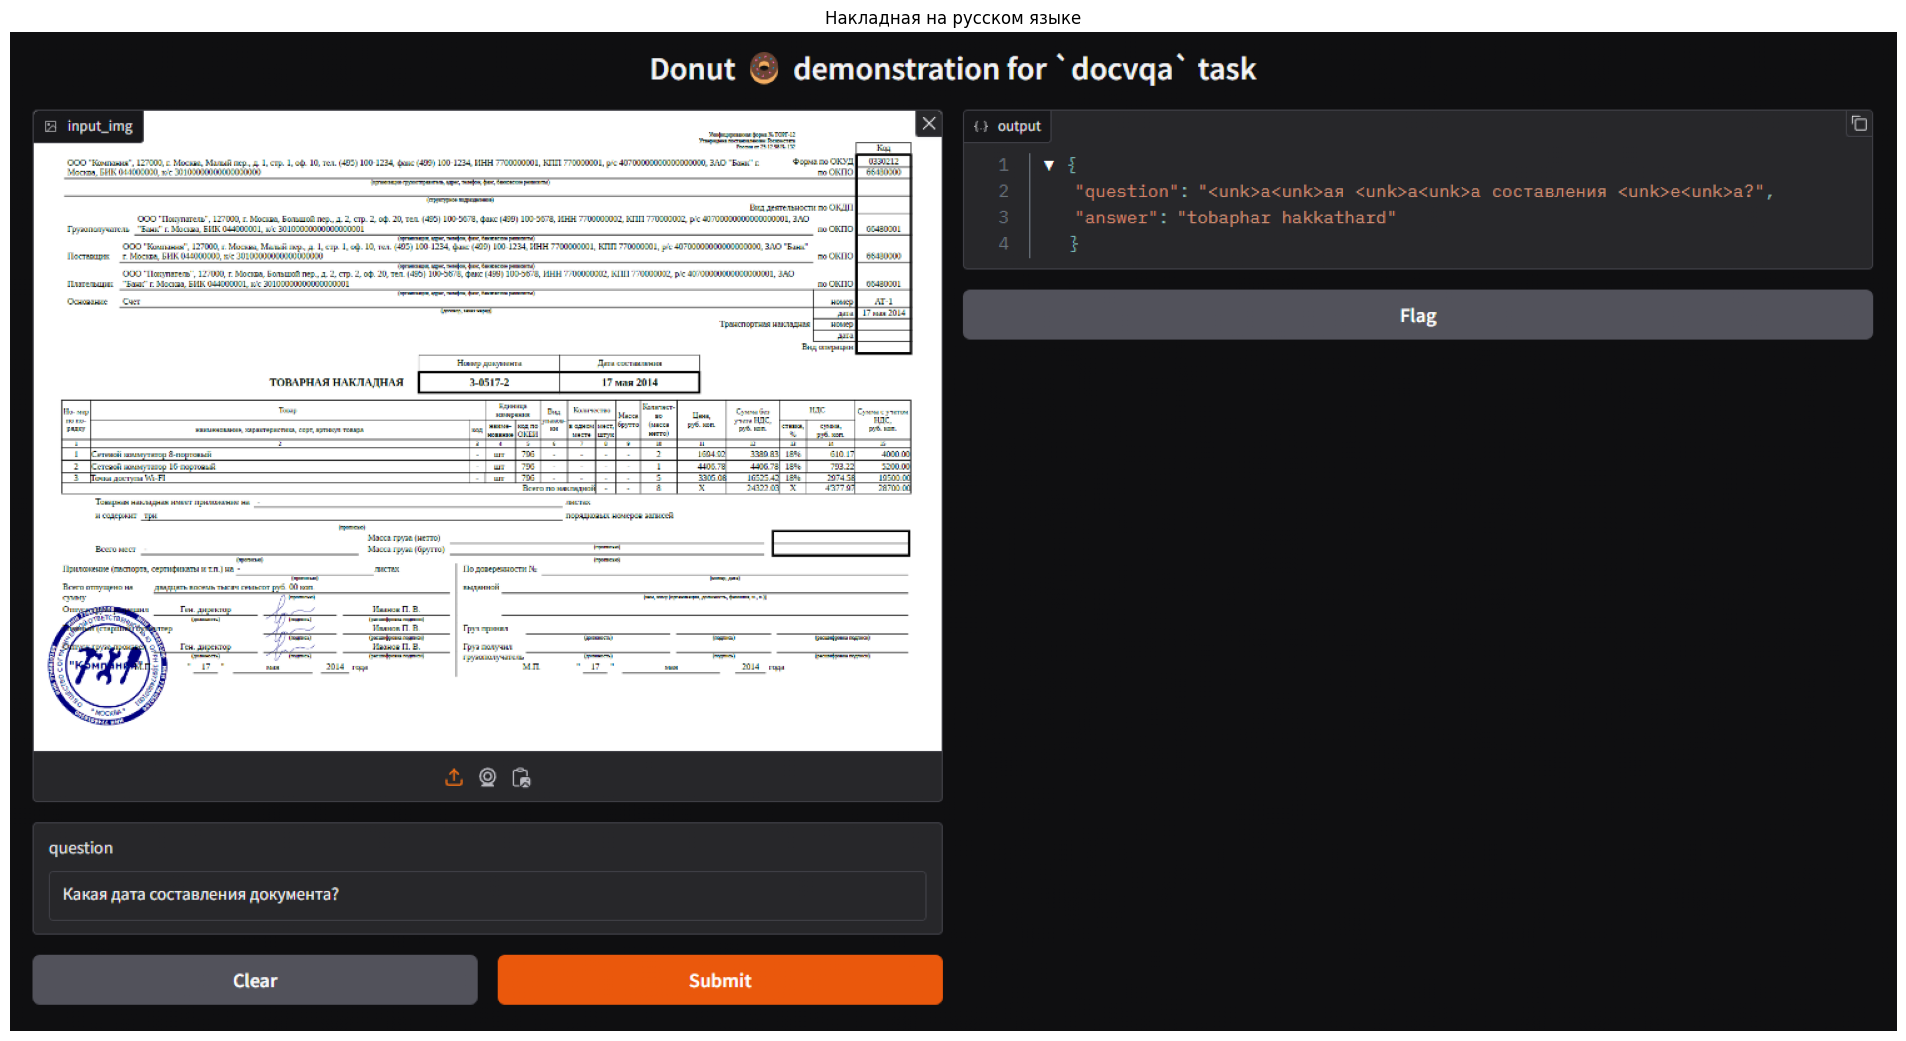

In [17]:
display_image_in_actual_size('/content/donut_docqa_test1_ru_invoice.png', title='Накладная на русском языке')

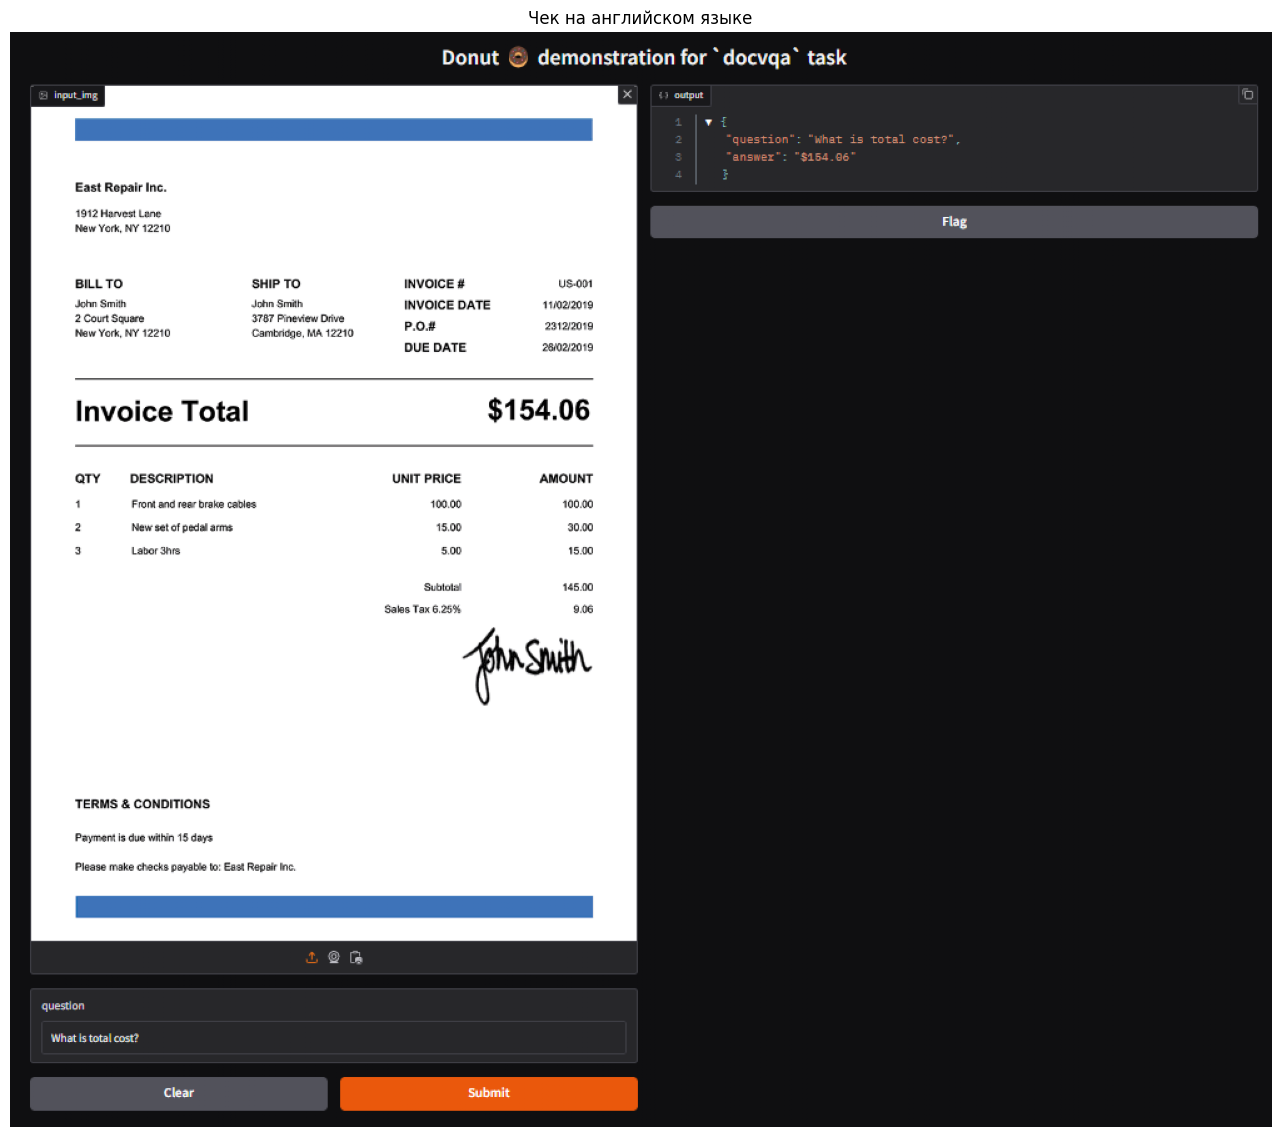

In [18]:
display_image_in_actual_size('/content/donut_docqa_test2_en_invoice.png', title='Чек на английском языке')

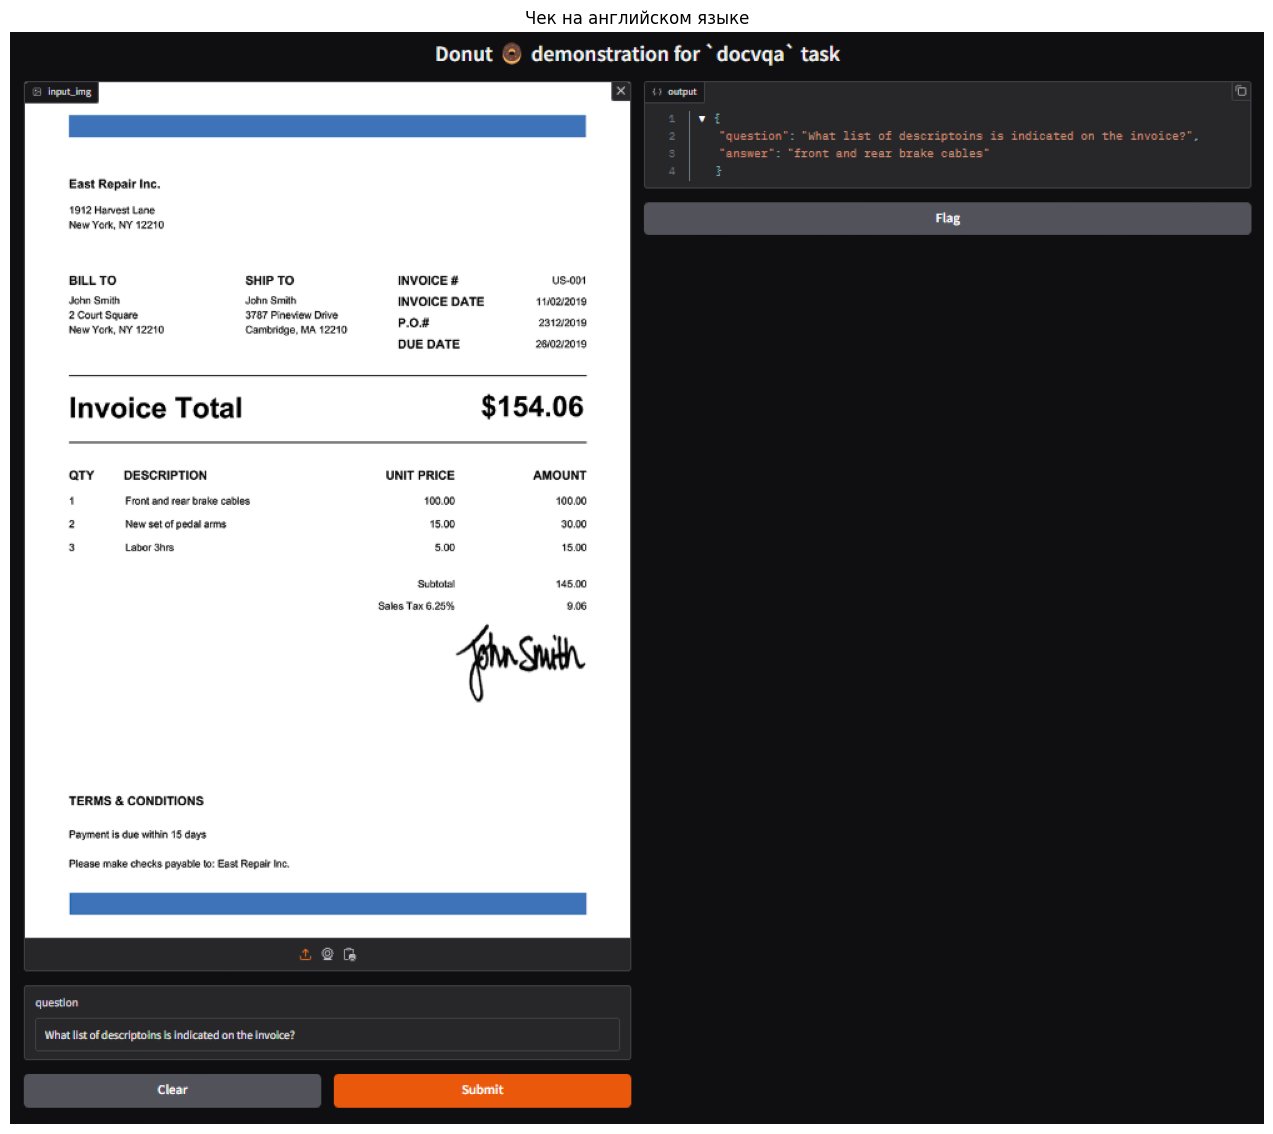

In [19]:
display_image_in_actual_size('/content/donut_docqa_test3_en_invoice.png', title='Чек на английском языке')